In [3]:
data = [[1.6698725,1.571231,2.379548,3.136248,3.226992,4.693128,5.138278,6.529128,6.169206,7.742735],
[2.860529,4.311197,3.825184,4.495167,6.094431,9.504426,12.16096,13.17477,15.39926,16.2431],
[3.0658534,6.703369,9.022874,9.666152,8.117405,9.769786,10.176307,9.529709,10.004998,10.701531],
[3.4320162,4.234896,6.061428,5.327436,6.130362,6.284221,6.235878,6.556105,7.106874,7.624853],
[11.911184,16.559786,16.940847,18.76926,18.16784,18.51881,21.74805,21.3581,22.99261,24.06355],
[60.35689,65.00848,71.56669,75.02796,73.59816,78.68442,80.83705,82.9077,87.16344,88.24634]]
from scipy.ndimage.filters import gaussian_filter1d

ysmoothed = gaussian_filter1d(data, sigma=2)

import pandas as pd
dat = pd.DataFrame(ysmoothed, index=['yeast', 'human','cora','citeseer','pubmed','wordnet'], columns=['10','20','30','40','50','60','70','80','90','100']).T


In [4]:
dat

,yeast,human,cora,citeseer,pubmed,wordnet
10,2.007768,3.839875,6.135230,4.469879,15.183322,65.909084
20,2.209152,4.162006,6.695769,4.716488,15.764296,67.399556
30,2.593318,4.846684,7.537181,5.106304,16.691915,69.870655
40,3.128344,5.947782,8.336337,5.513561,17.705311,72.686522
50,3.775230,7.462116,8.936428,5.867799,18.692174,75.462125
60,4.487096,9.263784,9.351731,6.166938,19.670093,78.110564
70,5.204478,11.119153,9.652619,6.440518,20.656057,80.631390
80,5.855160,12.769881,9.886449,6.704531,21.586435,82.914847
90,6.358828,14.000397,10.063005,6.934473,22.331115,84.706965
100,6.636993,14.657346,10.163237,7.073579,22.749318,85.705423


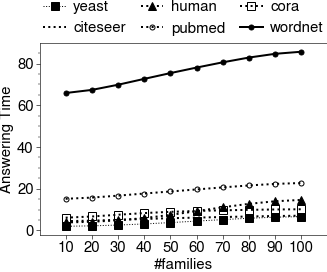

In [8]:
import matplotlib.pyplot as plt
import proplot as plot
import numpy as np
import pandas as pd
plot.rc['title.loc'] = 'uc'
# plot.rc['axes.ymargin'] = plot.rc['axes.xmargin'] = 0.05
plot.rc.small=15
plot.rc.large=24

f, axs = plot.subplots(
    nrows=1, ncols=1, aspect=1.5, axwidth=4,
    share=1, wratios=(1)
)
axs.format(
   xlim=(-1,10),xgrid=False, ygrid=False, ylabel='Answering Time',xlabel='#families'
)

cycle = 'default'
columns=['yeast', 'human','cora','citeseer','pubmed','wordnet']

cycle = plot.Cycle(['k','k','k','k','k','k'], marker=["s","^","s","",".","."], markersize=[8,8,8,10,10,10], linestyle=[":",":",":",":",":","-"], linewidth=[1,2,2,2,2,2,], fillstyle=['full','full','none','full','none','full'])

ax = axs[0]
obj = ax.plot(dat, cycle=cycle,legend='t', labels=columns, legend_kw={'frameon':False, 'ncols':3})
# obj = ax6.plot(dat, cycle=cycle,legend='ul', legend_kw={'frameon':False, 'ncols':1})
# ax.format(ylabel='Correlation')
# ax6.set_title('Wordnet')
# ax6.legend(loc='ul')


# f.legend(obj, columns)
plt.savefig("repet_time.eps")
plt.show()

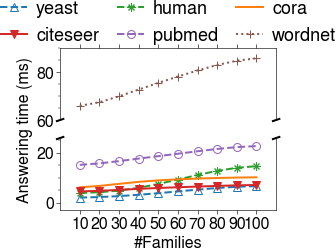

In [35]:
import matplotlib.pyplot as plt
import proplot as plot
import numpy as np
import pandas as pd
plot.rc['title.loc'] = 'uc'
plot.rc['axes.ymargin'] = plot.rc['axes.xmargin'] = 0.05
plot.rc.small=16
plot.rc.large=24

f, axs = plot.subplots(
    nrows=2, ncols=1, aspect=3, axwidth=3,axheight=1,
    share=1, wratios=(1), hspace=0.25
)
axs.format(
    xlim=(-1,10), ylim=(-1,-0.55), xgrid=False, ygrid=False, ylabel='Answering time (ms)',xlabel='#Families'
)

ax = axs[0]
ax2 = axs[1]

ax.set_ylim(60, 90)  # outliers only
ax2.set_ylim(-3, 26)  # most of the data

cycle = 'default'
columns=['yeast', 'human','cora','citeseer','pubmed','wordnet']

# cycle = plot.Cycle(['k','k','k','k','k','k'], marker=["s","^","s","",".","."], markersize=[8,8,8,10,10,10], linestyle=[":",":",":",":",":","-"], linewidth=[1,2,2,2,2,2,], fillstyle=['full','full','none','full','none','full'])
# cycle = plot.Cycle(['b','g','k','r','m','k'], marker=["^",(8,2,0),"","v","o","+"], 
#                    markersize=[8,8,8,8,8,8], linestyle=["--","--","-","-","--",":"], 
#                    linewidth=[2,2,2,2,2,2], 
#                    fillstyle=['none','full','full','full','none','full'])
import matplotlib.colors as mcolors

tab_color = mcolors.TABLEAU_COLORS
tab_colors = [tab_color['tab:blue'],tab_color['tab:green'], tab_color['tab:orange'],tab_color['tab:red'],tab_color['tab:purple'],tab_color['tab:brown']]
cycle = plot.Cycle(tab_colors, marker=["^",(8,2,0),"","v","o","+"], 
                   markersize=[8,8,8,8,8,8], linestyle=["--","--","-","-","--",":"], 
                   linewidth=[2,2,2,2,2,2], 
                   fillstyle=['none','full','full','full','none','full'])


ax = axs[0]
obj = ax.plot(dat, cycle=cycle, legend='', labels=columns, legend_kw={'frameon':False, 'ncols':3,'fontsize':'18'})
# obj = ax.plot(dat.iloc[[1,4,7,10,13,16,19]], cycle=cycle)
# obj = ax6.plot(dat, cycle=cycle,legend='ul', legend_kw={'frameon':False, 'ncols':1})
# ax.format(ylabel='Correlation')
# ax6.set_title('Wordnet')
# ax6.legend(loc='r')

ax2.plot(dat, cycle=cycle)


ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False,marker="",linestyle="-",linewidth=2)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

f.legend(obj, columns,loc='t',frameon=False, ncols=3,fontsize=18,space='0.22em')
plt.savefig("repet_time.eps")
plt.show()